In [22]:
#How to hashtag alt på en gang:  alt + shift marker alt men kun ude i siden - slip! og så lav hashtag
# marker et ord - command + D så kan man rette i alle ord samtidig

import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import shap


In [23]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')


Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [24]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#X_train_cut = X_train[:5000]
#X_test_cut = X_test[:5000]
#y_train_cut = y_train[:5000]
#y_test_cut = y_test[:5000]

X_train_cut = X_train
X_test_cut = X_test
y_train_cut = y_train
y_test_cut = y_test



TYPES OF CLASSIFYERS
- Naive Bayes

- Logistic regression

- K-nearest neighbors

- (Kernel) SVM

- Decision tree: XGboost

- Ensemble learning

- NN


In [25]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                            max_depth=10, eval_metric='logloss', n_estimators=300,
                            seed=42)
xgb_clf.fit(X_train_cut.values, y_train_cut.values)

pred = xgb_clf.predict(X_test_cut)

print(f"Train accuracy: {accuracy_score(pred, y_test_cut)*100.0:.2f}%")

Train accuracy: 94.23%


In [19]:

xgb_importance = xgb_clf.feature_importances_
print(xgb_importance)

[0.00242732 0.         0.         0.         0.         0.
 0.002527   0.00308791 0.00432692 0.00328925 0.00226984 0.00346777
 0.00349048 0.00289695 0.00622496 0.044713   0.0035202  0.00725849
 0.00268304 0.00355523 0.00459503 0.00188233 0.00287355 0.
 0.         0.00433138 0.00214215 0.00153316 0.00326288 0.00263239
 0.00326377 0.00044968 0.         0.00509233 0.001954   0.
 0.         0.00378746 0.00369831 0.00287142 0.00271317 0.00256101
 0.00194619 0.00292403 0.00515469 0.0203526  0.00736667 0.00508611
 0.00308073 0.00215978 0.02940034 0.10895956 0.00919553 0.00578138
 0.00298986 0.00248509 0.00640335 0.01492031 0.00302046 0.00147759
 0.00251735 0.0027895  0.0063294  0.         0.0010609  0.00408851
 0.         0.         0.         0.00304538 0.         0.00380607
 0.00413133 0.         0.00304897 0.         0.         0.
 0.01594865 0.00271805 0.         0.00434153 0.00301464 0.00322822
 0.00531424 0.00307708 0.00270626 0.00573928 0.00550031 0.00305099
 0.00358802 0.00258157 0.00

Text(0.5, 0, 'Permutation Importance')

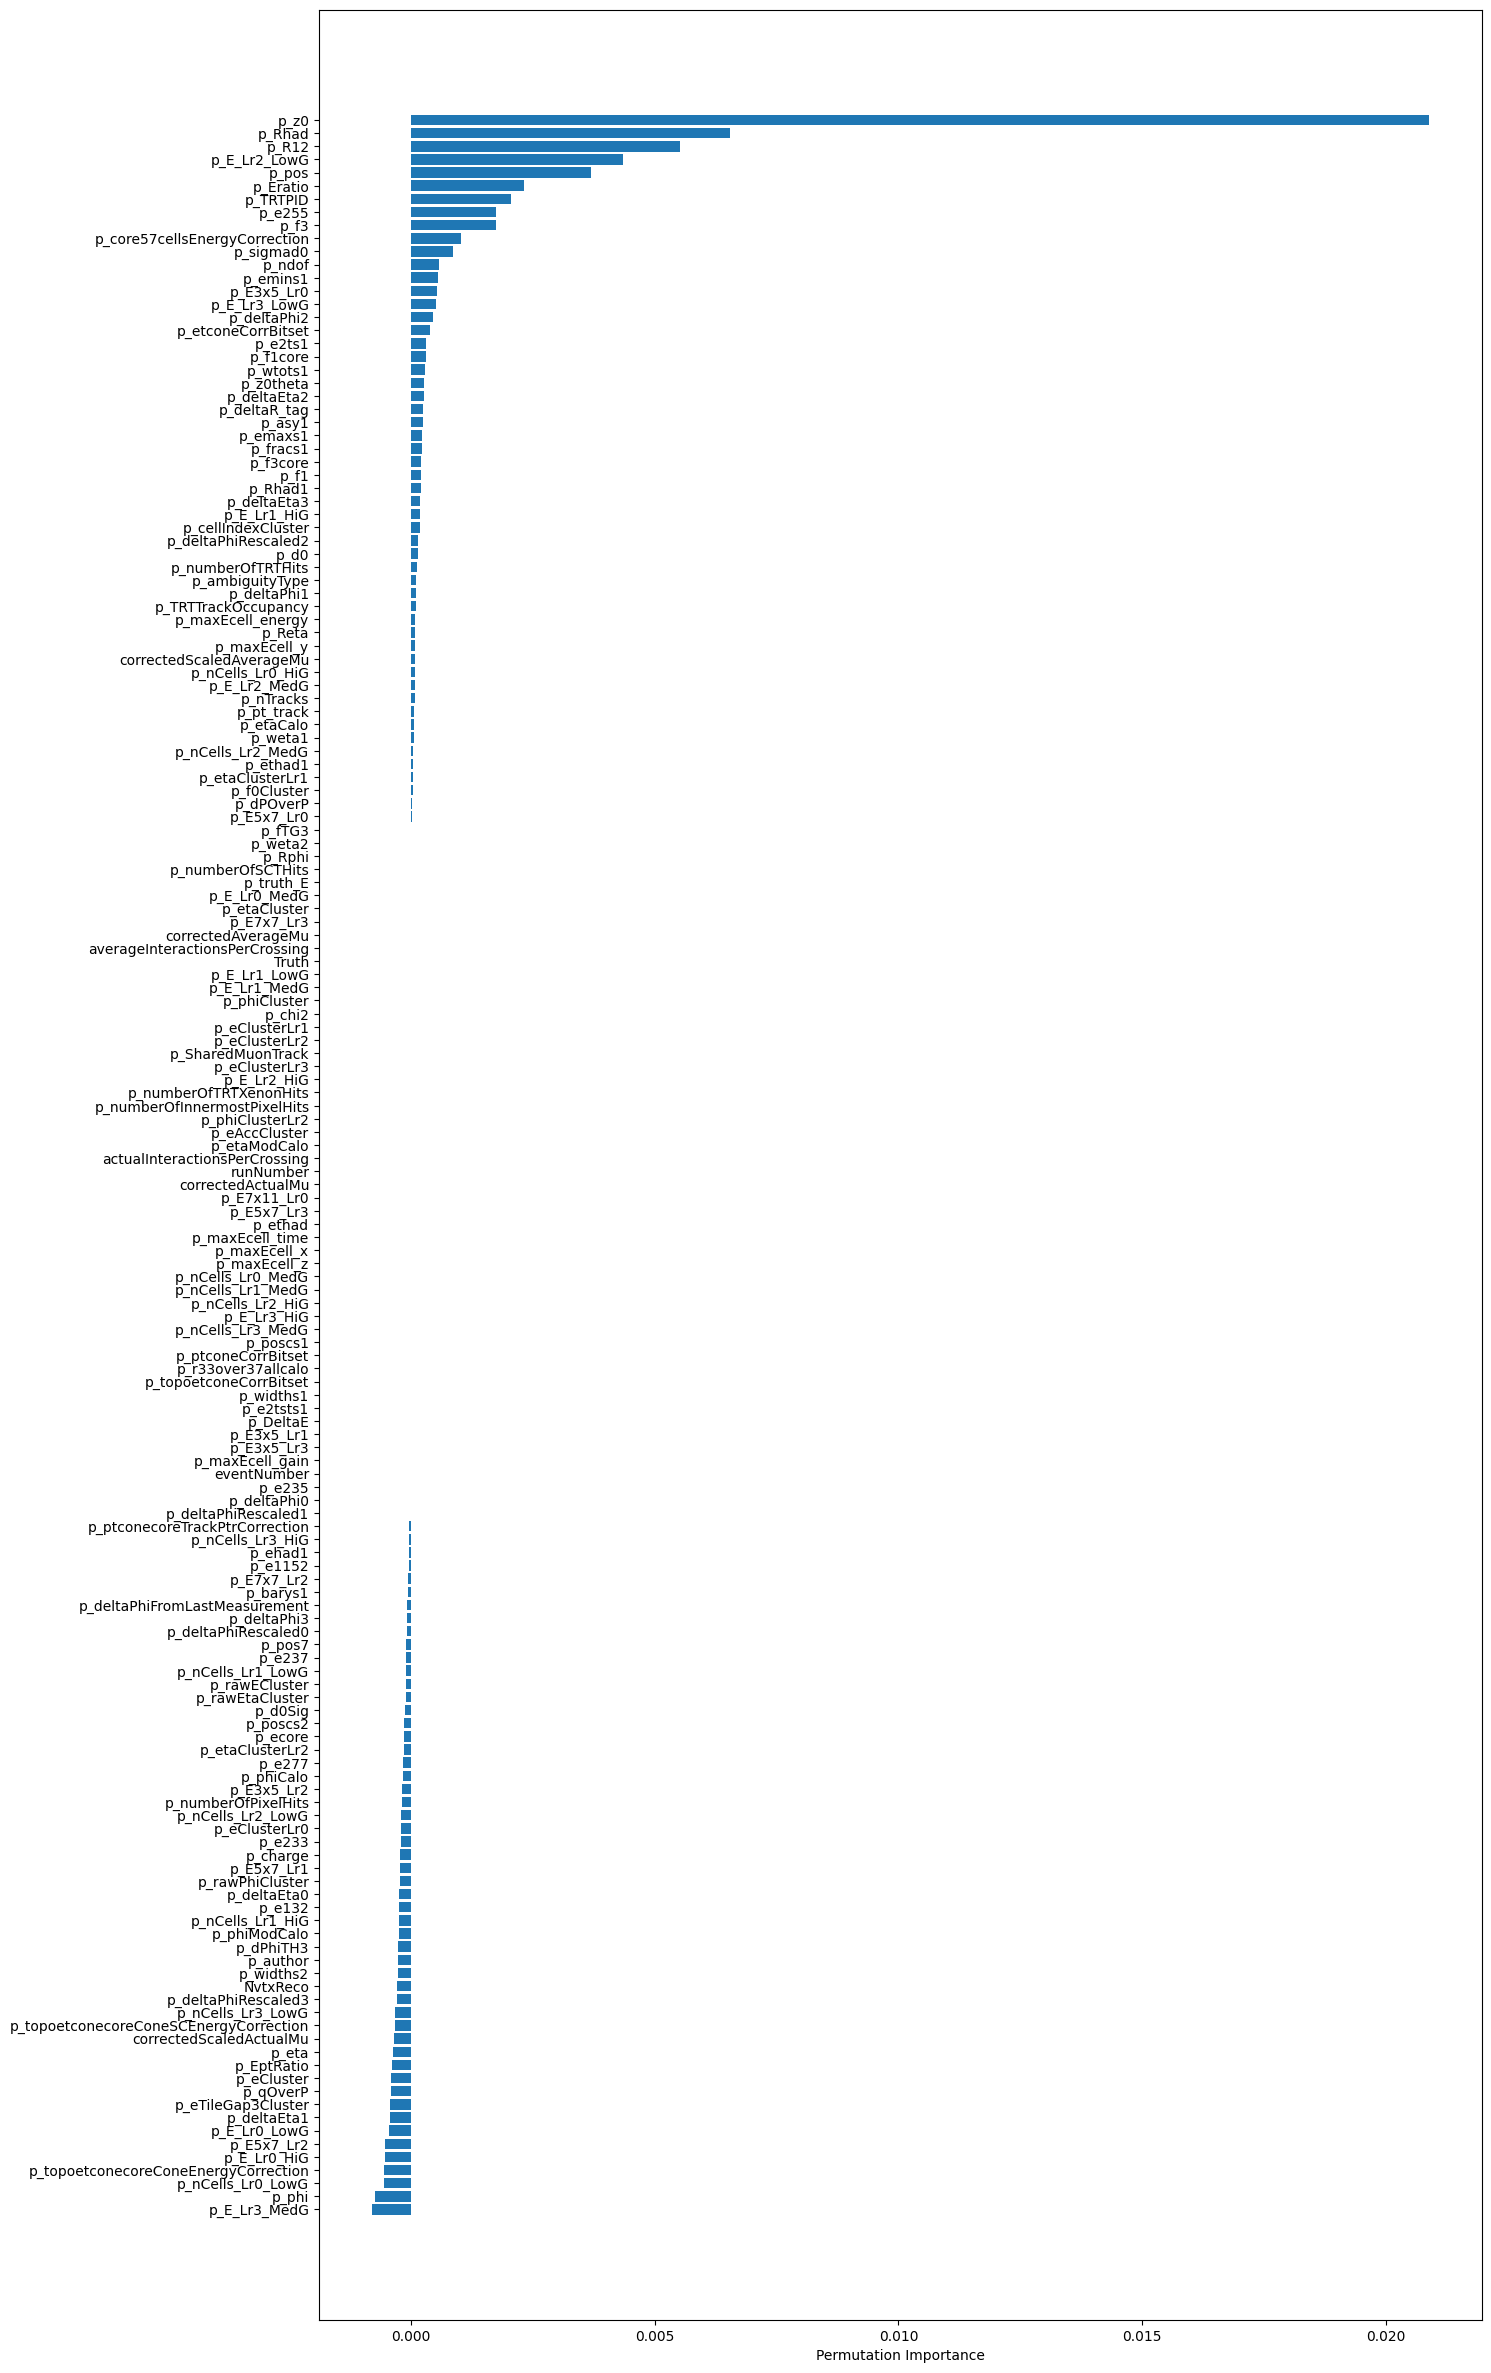

In [5]:
#You'll occasionally see negative values for permutation importances. 
#In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. 
#This happens when the feature didn't matter (should have had an importance close to 0), 
#but random chance caused the predictions on shuffled data to be more accurate. 
#This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_clf, X_test_cut, y_test_cut, n_repeats=10, random_state=0, n_jobs=2)

sorted_idx = perm_importance.importances_mean.argsort()

fig, ax = plt.subplots(1, figsize=(15, 30))
ax.barh(train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
ax.set_xlabel("Permutation Importance")

In [11]:
print(perm_importance.importances_mean[sorted_idx][-15:])
chosen_variables = train.columns[sorted_idx][-15:]
print(chosen_variables)

[0.00044 0.00048 0.00048 0.00052 0.00076 0.00164 0.00172 0.00184 0.002
 0.00208 0.00392 0.00452 0.00548 0.00552 0.02316]
Index(['p_emins1', 'p_E3x5_Lr0', 'p_f1core', 'p_Reta', 'p_ndof', 'p_e255',
       'p_core57cellsEnergyCorrection', 'p_f3', 'p_Eratio', 'p_TRTPID',
       'p_pos', 'p_E_Lr2_LowG', 'p_Rhad', 'p_R12', 'p_z0'],
      dtype='object')


In [ ]:
X = train[chosen_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_cut = X_train[:5000]
X_test_cut = X_test[:5000]
y_train_cut = y_train[:5000]
y_test_cut = y_test[:5000]

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                            max_depth=10, eval_metric='logloss', n_estimators=300,
                            seed=42)
xgb_clf.fit(X_train_cut.values, y_train_cut.values)

pred = xgb_clf.predict(X_test_cut)

print(f"Train accuracy: {accuracy_score(pred, y_test_cut)*100.0:.2f}%")

Train accuracy: 91.06%


In [ ]:
#n_var = 15
#truth_corr = train.corr()['Truth']
#truth_corr = truth_corr[all_variables]
#truth_corr = abs(truth_corr)
#truth_corr = truth_corr.sort_values(ascending = False)
#truth_corr = truth_corr[:15]
#chosen_variables = truth_corr.index.values.tolist()
#
#print(chosen_variables)

In [ ]:
#corr = df.corr()
#fig = plt.figure(figsize = (50,50))
#ax = fig.add_subplot(111)
#cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
#fig.colorbar(cax)
#ticks = np.arange(0,len(df.columns),1)
#ax.set_xticks(ticks)
#plt.xticks(rotation=90)
#ax.set_yticks(ticks)
#ax.set_xticklabels(df.columns)
#ax.set_yticklabels(df.columns)
#plt.show()